# **5 Modeling: Air Quality**

At this stage of the project, now that the data has been processed and cleaned, we'll proceed with the machine learning modeling phase. Here, we'll implement, train, and test various multiclass machine learning algorithms. Subsequently, we'll evaluate the performance of each algorithm by computing relevant metrics. This process will aid us in selecting the most suitable model for our specific use case.

## **Methodology**

* [1. Lead the Processed Dataset](#1_load)
* [2. Train and Test Split and Validations](#2_tt)
* [3. Modeling](#3_mod)
    * [3.1 Benchmark Model: Dummy Classifier](#31_dum)
    * [3.2 Decision Tree Classifier](#32_dt)
    * [3.3 Random Forest Classifier](#33_rf)
    * [3.4 XGboost Classifier](#34_xg)
* [4. Identify the Best Performer](#4_bp)
* [5. Saving the model (.pkl)](#5_sm)

In [1]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings

In [2]:
# Ignore UserWarning
warnings.filterwarnings("ignore", category=UserWarning)

---

### **1. Load the processed dataset**<a id='1_load'></a>

In [3]:
# Load the processed dataset
file_path = '../data/processed/processed_air_quality_data.csv'
df = pd.read_csv(file_path)

In [4]:
# Dataset snapshot
df.head()

,PM2.5,PM10,NO,NO2,NOx,Air_Quality
0,3.391484,2.824351,3.922369,4.106932,0.019803,2
1,3.390473,2.824351,3.901771,4.585682,0.039221,5
2,3.516310,2.824351,4.225227,4.721441,0.215111,4
3,3.763059,2.824351,4.333755,4.641502,0.336472,4
4,3.592093,2.824351,4.026066,4.685644,0.378436,4


In [5]:
# Dataset validation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52974 entries, 0 to 52973
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PM2.5        52974 non-null  float64
 1   PM10         52974 non-null  float64
 2   NO           52974 non-null  float64
 3   NO2          52974 non-null  float64
 4   NOx          52974 non-null  float64
 5   Air_Quality  52974 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 2.4 MB


---

### **2. Train and test split and validations**<a id='2_tt'></a>

In this section, we will divide our data in train and test splits so we can train and validate our machine learning models' performances and run the last validations before inputting the data in our models

In [6]:
# Ensure there are no duplicates
print("Number of duplicates:", df.duplicated().sum())
df = df.drop_duplicates()

Number of duplicates: 143


In [7]:
# Define features and target
X = df.drop(columns=['Air_Quality'])
y = df['Air_Quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

---

### **3. Modeling**<a id='3_mod'></a>

In this section, we will try different machine learning models to build our multiclass classifier and select the best performer. Initially, we'll start with a Dummy Classifier as a baseline to provide a benchmark for comparison. Following this, we train a Decision Tree classifier, a Random Forest classifier, and an XGBoost classifier, each increasing in complexity. 

For each model, we'll perform hyperparameter tuning using `RandomizedSearchCV` to find the best configuration. We evaluate each model using accuracy, confusion matrix, and classification report to understand their performance. Finally, we identify the best performing model based on accuracy and save it to a pickle file for future use. Additionally, we visualize the confusion matrices for the top models to inspect their performance further.

#### **3.1 Dummy Classifier**<a id='31_dum'></a>

This is our benchmark model

In [8]:
# 3.1 Dummy Classifier (Benchmark)
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)
y_pred_dummy = dummy_clf.predict(X_test)
print("Dummy Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dummy)}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_dummy)}\n")
print(f"Classification Report:\n{classification_report(y_test, y_pred_dummy, zero_division=0)}")

Dummy Classifier:
Accuracy: 0.16712933753943218

Confusion Matrix:
[[   0    0    0    0 2632    0]
 [   0    0    0    0 2636    0]
 [   0    0    0    0 2645    0]
 [   0    0    0    0 2639    0]
 [   0    0    0    0 2649    0]
 [   0    0    0    0 2649    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2632
           1       0.00      0.00      0.00      2636
           2       0.00      0.00      0.00      2645
           3       0.00      0.00      0.00      2639
           4       0.17      1.00      0.29      2649
           5       0.00      0.00      0.00      2649

    accuracy                           0.17     15850
   macro avg       0.03      0.17      0.05     15850
weighted avg       0.03      0.17      0.05     15850



#### **3.2 Decision Tree Classifier**<a id='32_dt'></a>

In [9]:
# 3.2 Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

print("\nDecision Tree Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_dt)}\n")
print(f"Classification Report:\n{classification_report(y_test, y_pred_dt, zero_division=0)}")


Decision Tree Classifier:
Accuracy: 0.7038485804416403

Confusion Matrix:
[[2316   65   37  200    6    8]
 [  93 1247  436  593   77  190]
 [  35  361 1823  142   64  220]
 [ 289  553  180 1487   42   88]
 [   6   66   82   25 2308  162]
 [  14  129  237   70  224 1975]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      2632
           1       0.52      0.47      0.49      2636
           2       0.65      0.69      0.67      2645
           3       0.59      0.56      0.58      2639
           4       0.85      0.87      0.86      2649
           5       0.75      0.75      0.75      2649

    accuracy                           0.70     15850
   macro avg       0.70      0.70      0.70     15850
weighted avg       0.70      0.70      0.70     15850



In [10]:
# Hyperparameter tuning for Decision Tree using RandomizedSearchCV
param_dist_dt = {'max_depth': [3, 5, 10, None], 
                 'min_samples_split': [2, 5, 10], 
                 'min_samples_leaf': [1, 2, 4]}

# Hyperparameter tunning
random_search_dt = RandomizedSearchCV(dt_clf, param_distributions=param_dist_dt, n_iter=10, cv=5, random_state=42, n_jobs=-1)
random_search_dt.fit(X_train, y_train)
best_dt_clf = random_search_dt.best_estimator_
y_pred_best_dt = best_dt_clf.predict(X_test)

print("\nBest Decision Tree Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_dt)}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_best_dt)}\n")
print(f"Classification Report:\n{classification_report(y_test, y_pred_best_dt, zero_division=0)}")


Best Decision Tree Classifier:
Accuracy: 0.6863722397476341

Confusion Matrix:
[[2371   85   20  147    1    8]
 [ 120 1409  400  498   63  146]
 [  58  485 1746  104   64  188]
 [ 363  672  185 1325   31   63]
 [   8  102   98   36 2250  155]
 [  20  214  295   67  275 1778]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      2632
           1       0.47      0.53      0.50      2636
           2       0.64      0.66      0.65      2645
           3       0.61      0.50      0.55      2639
           4       0.84      0.85      0.84      2649
           5       0.76      0.67      0.71      2649

    accuracy                           0.69     15850
   macro avg       0.69      0.69      0.68     15850
weighted avg       0.69      0.69      0.68     15850



#### **3.3 Random Forest Classifier**<a id='33_rf'></a>

In [11]:
# 3.3 Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print("\nRandom Forest Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}\n")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf, zero_division=0)}")


Random Forest Classifier:
Accuracy: 0.7974763406940063

Confusion Matrix:
[[2518   14    8   91    0    1]
 [  73 1481  322  563   61  136]
 [  11  228 2109   95   48  154]
 [ 266  434   77 1781   27   54]
 [   5   25   37   12 2483   87]
 [   9   77  143   33  119 2268]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2632
           1       0.66      0.56      0.61      2636
           2       0.78      0.80      0.79      2645
           3       0.69      0.67      0.68      2639
           4       0.91      0.94      0.92      2649
           5       0.84      0.86      0.85      2649

    accuracy                           0.80     15850
   macro avg       0.79      0.80      0.79     15850
weighted avg       0.79      0.80      0.79     15850



In [12]:
# Hyperparameter tuning for Random Forest using RandomizedSearchCV
param_dist_rf = {'n_estimators': [100, 200, 500], 
                 'max_features': ['auto', 'sqrt', 'log2'], 
                 'max_depth': [10, 20, 30, None], 
                 'min_samples_split': [2, 5, 10], 
                 'min_samples_leaf': [1, 2, 4]}

# Hyperparameter tunning
random_search_rf = RandomizedSearchCV(rf_clf, param_distributions=param_dist_rf, n_iter=10, cv=5, random_state=42, n_jobs=-1)
random_search_rf.fit(X_train, y_train)
best_rf_clf = random_search_rf.best_estimator_
y_pred_best_rf = best_rf_clf.predict(X_test)

print("\nBest Random Forest Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_rf)}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_best_rf)}\n")
print(f"Classification Report:\n{classification_report(y_test, y_pred_best_rf, zero_division=0)}")

c:\Users\pablo\.conda\envs\python-dsf\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\pablo\.conda\envs\python-dsf\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\pablo\.conda\envs\python-dsf\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\pablo\.conda\envs\python-dsf\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(



Best Random Forest Classifier:
Accuracy: 0.7941324921135646

Confusion Matrix:
[[2513   11    7   98    0    3]
 [  78 1440  334  581   63  140]
 [  14  224 2093   99   45  170]
 [ 275  417   78 1790   27   52]
 [   6   22   38   14 2485   84]
 [   7   77  148   34  117 2266]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2632
           1       0.66      0.55      0.60      2636
           2       0.78      0.79      0.78      2645
           3       0.68      0.68      0.68      2639
           4       0.91      0.94      0.92      2649
           5       0.83      0.86      0.84      2649

    accuracy                           0.79     15850
   macro avg       0.79      0.79      0.79     15850
weighted avg       0.79      0.79      0.79     15850



#### **3.4 XGboost Classifier**<a id='34_xg'></a>

In [13]:
# 4. XGBoost Classifier
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

print("\nXGBoost Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_xgb)}\n")
print(f"Classification Report:\n{classification_report(y_test, y_pred_xgb, zero_division=0)}")


XGBoost Classifier:
Accuracy: 0.7007570977917981

Confusion Matrix:
[[2413   34   12  170    0    3]
 [ 123 1274  411  563   85  180]
 [  37  351 1644  161   91  361]
 [ 399  384  134 1614   36   72]
 [   6   49   81   27 2261  225]
 [  19  104  305   53  267 1901]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      2632
           1       0.58      0.48      0.53      2636
           2       0.64      0.62      0.63      2645
           3       0.62      0.61      0.62      2639
           4       0.83      0.85      0.84      2649
           5       0.69      0.72      0.71      2649

    accuracy                           0.70     15850
   macro avg       0.69      0.70      0.70     15850
weighted avg       0.69      0.70      0.70     15850



In [14]:
# Hyperparameter tuning for XGBoost using RandomizedSearchCV
param_dist_xgb = {'n_estimators': [100, 200, 500], 
                  'learning_rate': [0.01, 0.1, 0.2], 
                  'max_depth': [3, 5, 7], 
                  'subsample': [0.7, 0.8, 0.9]}

# Hyperparameter tunning
random_search_xgb = RandomizedSearchCV(xgb_clf, param_distributions=param_dist_xgb, n_iter=10, cv=5, random_state=42, n_jobs=-1)
random_search_xgb.fit(X_train, y_train)
best_xgb_clf = random_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb_clf.predict(X_test)

print("\nBest XGBoost Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_xgb)}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_best_xgb)}\n")
print(f"Classification Report:\n{classification_report(y_test, y_pred_best_xgb, zero_division=0)}")


Best XGBoost Classifier:
Accuracy: 0.7272555205047319

Confusion Matrix:
[[2454   27    9  137    2    3]
 [  84 1313  385  611   76  167]
 [  19  368 1752  153   62  291]
 [ 308  432  117 1687   26   69]
 [   7   39   67   33 2330  173]
 [  10  117  257   50  224 1991]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2632
           1       0.57      0.50      0.53      2636
           2       0.68      0.66      0.67      2645
           3       0.63      0.64      0.64      2639
           4       0.86      0.88      0.87      2649
           5       0.74      0.75      0.75      2649

    accuracy                           0.73     15850
   macro avg       0.72      0.73      0.72     15850
weighted avg       0.72      0.73      0.72     15850



---

### **4. Identify the best performer**<a id='4_bp'></a>

In [15]:
# Identify the best performing model
best_model = None
best_accuracy = 0

models = {'Best Decision Tree': best_dt_clf, 
          'Best Random Forest': best_rf_clf, 
          'Best XGBoost': best_xgb_clf}

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

print(f"\nBest Model: {type(best_model).__name__} with accuracy: {best_accuracy}")


Best Model: RandomForestClassifier with accuracy: 0.7941324921135646


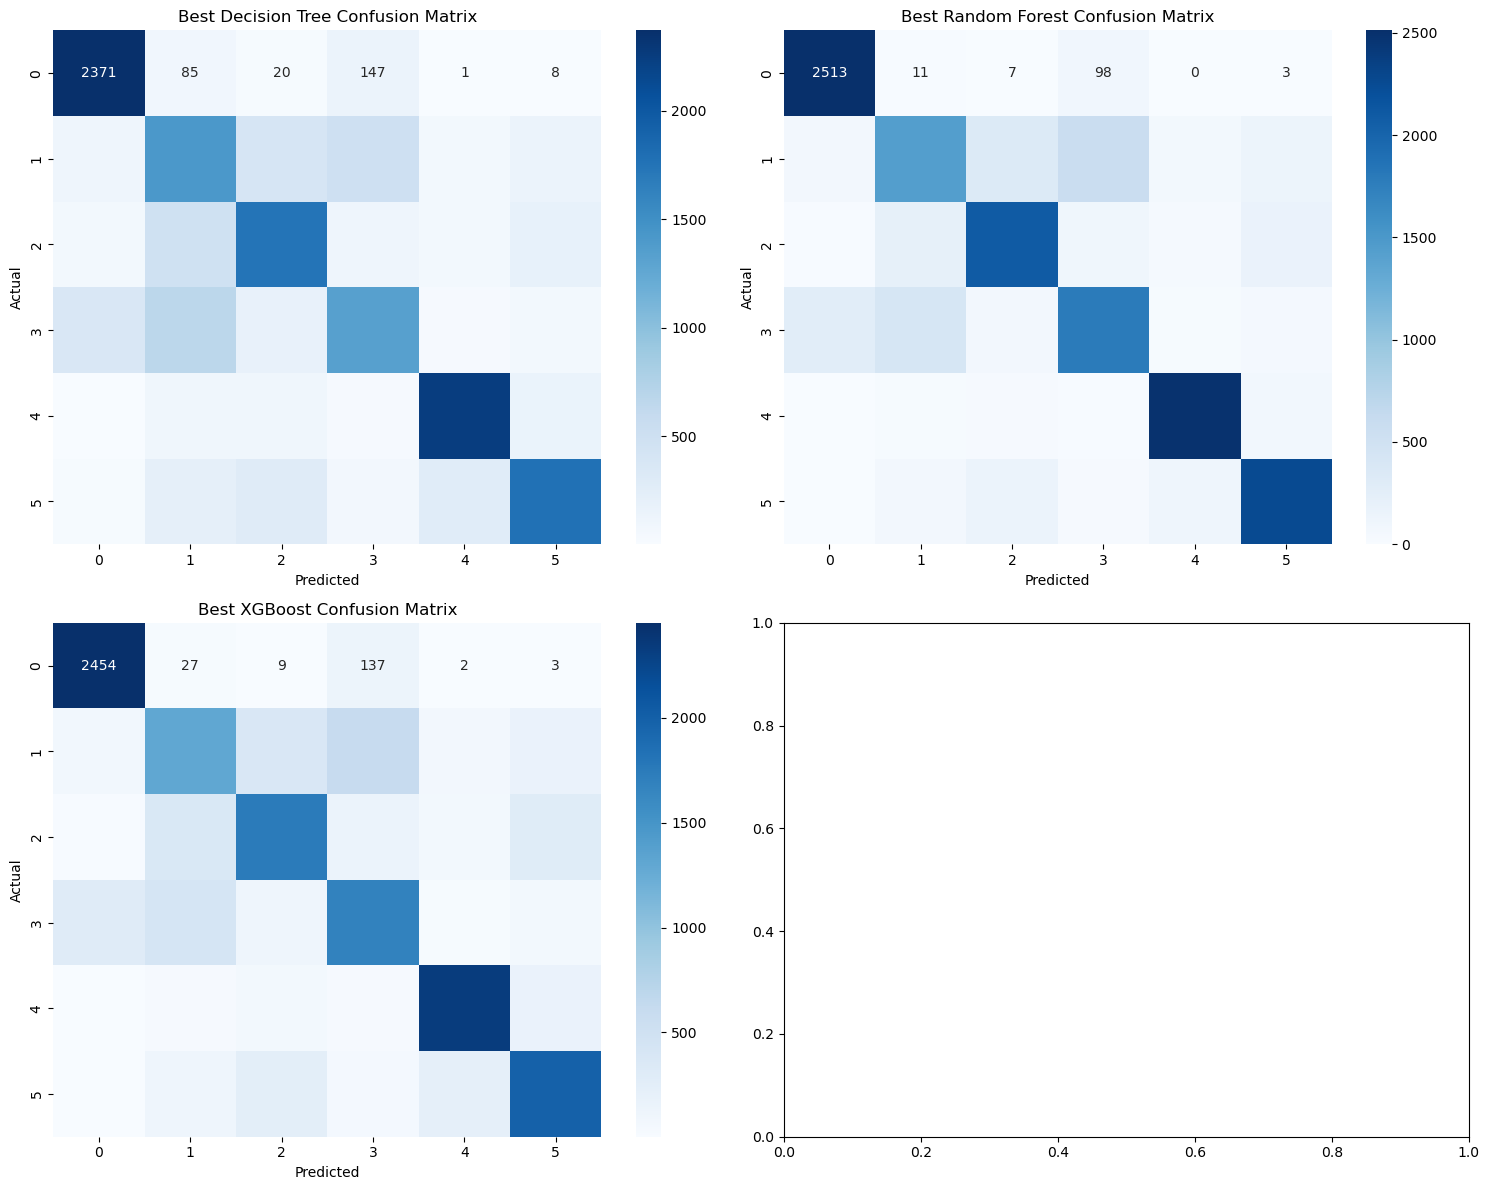

In [16]:
# Plot confusion matrices for the best models
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()
model_names = ['Best Decision Tree', 'Best Random Forest', 'Best XGBoost']
predictions = [y_pred_best_dt, y_pred_best_rf, y_pred_best_xgb]

for ax, model, name, y_pred in zip(axes, models.values(), model_names, predictions):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

---

### **5. Saving the model**<a id='5_sm'></a>

In this last section, we will save the best performer model into a pickle file for later usage.

In [17]:
# Save the best performing model to a pickle file
pickle_file_path = '../models/best_class_model.pkl'
with open(pickle_file_path, 'wb') as file:
    pickle.dump(best_model, file)
print(f"Best model saved to {pickle_file_path}")

Best model saved to ../models/best_class_model.pkl
